# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import confusion_matrix,r2_score,mean_squared_error
from sklearn.model_selection import GridSearchCV,train_test_split
import statsmodels.api as sm
from scipy import stats
from sklearn.preprocessing import PowerTransformer
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Reading and understanding Data

In [2]:
# Load data
df=pd.read_csv("train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
#Check Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
# Check shape
df.shape

(1460, 81)

In [5]:
# Check Columns
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
#Check Statistics
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# EDA # 

### Data Cleaning

In [7]:
#identification null values by column
df.isnull().sum().to_dict()

{'Id': 0,
 'MSSubClass': 0,
 'MSZoning': 0,
 'LotFrontage': 259,
 'LotArea': 0,
 'Street': 0,
 'Alley': 1369,
 'LotShape': 0,
 'LandContour': 0,
 'Utilities': 0,
 'LotConfig': 0,
 'LandSlope': 0,
 'Neighborhood': 0,
 'Condition1': 0,
 'Condition2': 0,
 'BldgType': 0,
 'HouseStyle': 0,
 'OverallQual': 0,
 'OverallCond': 0,
 'YearBuilt': 0,
 'YearRemodAdd': 0,
 'RoofStyle': 0,
 'RoofMatl': 0,
 'Exterior1st': 0,
 'Exterior2nd': 0,
 'MasVnrType': 8,
 'MasVnrArea': 8,
 'ExterQual': 0,
 'ExterCond': 0,
 'Foundation': 0,
 'BsmtQual': 37,
 'BsmtCond': 37,
 'BsmtExposure': 38,
 'BsmtFinType1': 37,
 'BsmtFinSF1': 0,
 'BsmtFinType2': 38,
 'BsmtFinSF2': 0,
 'BsmtUnfSF': 0,
 'TotalBsmtSF': 0,
 'Heating': 0,
 'HeatingQC': 0,
 'CentralAir': 0,
 'Electrical': 1,
 '1stFlrSF': 0,
 '2ndFlrSF': 0,
 'LowQualFinSF': 0,
 'GrLivArea': 0,
 'BsmtFullBath': 0,
 'BsmtHalfBath': 0,
 'FullBath': 0,
 'HalfBath': 0,
 'BedroomAbvGr': 0,
 'KitchenAbvGr': 0,
 'KitchenQual': 0,
 'TotRmsAbvGrd': 0,
 'Functional': 0,
 'Fir

In [8]:
# Dropping columns that have substantial number of null values
df.drop(['LotFrontage','Alley','FireplaceQu','PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

In [9]:
# Dropping ID 
df.drop('Id',axis=1,inplace=True)

In [10]:
# Drop duplicates
df.drop_duplicates(inplace=True)

In [11]:
# chaeck shape
df.shape

(1460, 74)

In [12]:
# Identify null columns and ther data type
null_columns=[(k,str(type(df[k].values[0]))) for k,v in df.isnull().sum().to_dict().items() if v!=0]
null_columns

[('MasVnrType', "<class 'str'>"),
 ('MasVnrArea', "<class 'numpy.float64'>"),
 ('BsmtQual', "<class 'str'>"),
 ('BsmtCond', "<class 'str'>"),
 ('BsmtExposure', "<class 'str'>"),
 ('BsmtFinType1', "<class 'str'>"),
 ('BsmtFinType2', "<class 'str'>"),
 ('Electrical', "<class 'str'>"),
 ('GarageType', "<class 'str'>"),
 ('GarageYrBlt', "<class 'numpy.float64'>"),
 ('GarageFinish', "<class 'str'>"),
 ('GarageQual', "<class 'str'>"),
 ('GarageCond', "<class 'str'>")]

In [13]:
# Saperate Categorical & Numerical Null columns
categorical_null_columns=[]
numerical_null_columns=[]
for x in null_columns:
    if x[1]=="<class 'str'>":
        categorical_null_columns.append(x[0])
    else:
        numerical_null_columns.append(x[0])

In [14]:
# Fill numerical null values with median
for column in numerical_null_columns:
    df[column].fillna(df[column].median(),inplace=True)

In [15]:
# Fill categorical null values with mode
for column in categorical_null_columns:
    df[column].fillna(df[column].mode()[0],inplace=True)

In [16]:
# Check if we have any null values
df.isnull().sum().sum()

0

In [17]:
# Check shape
df.shape

(1460, 74)

In [18]:
# Check the unique values for Utilities,Street,PoolArea
print(df['Utilities'].value_counts())
print(df['Street'].value_counts())
print(df['PoolArea'].value_counts())

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
Pave    1454
Grvl       6
Name: Street, dtype: int64
0      1453
512       1
648       1
576       1
555       1
480       1
519       1
738       1
Name: PoolArea, dtype: int64


In [19]:
# Dropping redundant columns
df.drop(['Street', 'Utilities', 'PoolArea'],axis=1,inplace=True)

# Data Visualization

# Univariate and Bivariate Analysis

C:\Users\bhanuprakash.d\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

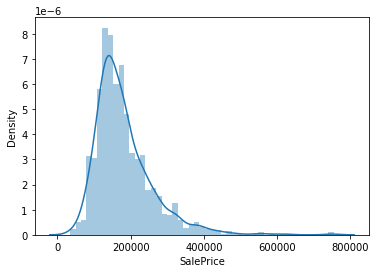

In [20]:
# Plot Saleprice
sns.distplot(df.SalePrice)

**Observation** <br>The distribution plot shows Saleprice is right skewed 

Text(0.5, 1.0, 'Basement Condition')

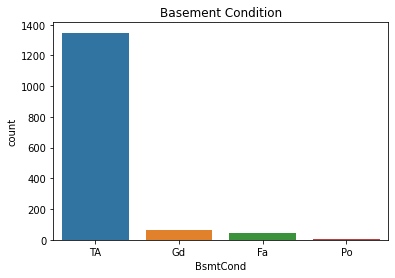

In [21]:
## Checking Basement counts
sns.countplot(x='BsmtCond', data= df)
plt.title('Basement Condition')

**Observation** <br>The Countplot shows most of the houses has Typical (80-89 inches) height of the basement

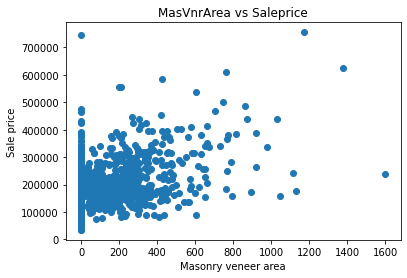

In [22]:
#plot MasVnrArea vs Saleprice
plt.scatter(df.MasVnrArea,df.SalePrice)
plt.xlabel("Masonry veneer area")
plt.ylabel("Sale price")
plt.title("MasVnrArea vs Saleprice")
plt.show()

**Observation** <br>The scatter plot shows most of the masonary veneer area lies between 0 and 500 . Th plot shows sale price increases as veneer area increases

Text(0.5, 1.0, 'Overall Condition')

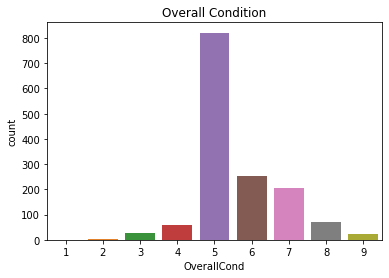

In [23]:
#plot Overall Condition
sns.countplot(x='OverallCond', data= df)
plt.title('Overall Condition')

**Observation** <br>The Countplot shows Overall rating  of house condition is given mostly 5 ratings out of 10

Text(0.5, 1.0, 'Overall Quality vs SalePrice')

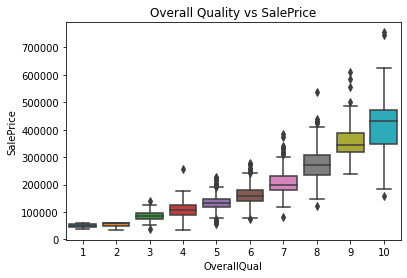

In [24]:
#plot Overall Quality vs SalePrice
sns.boxplot(x='OverallQual', y='SalePrice', data=df)
plt.title("Overall Quality vs SalePrice")

**Observation** <br>The boxplot shows overall quality increases as saleprice increases

# Multivariate Analysis

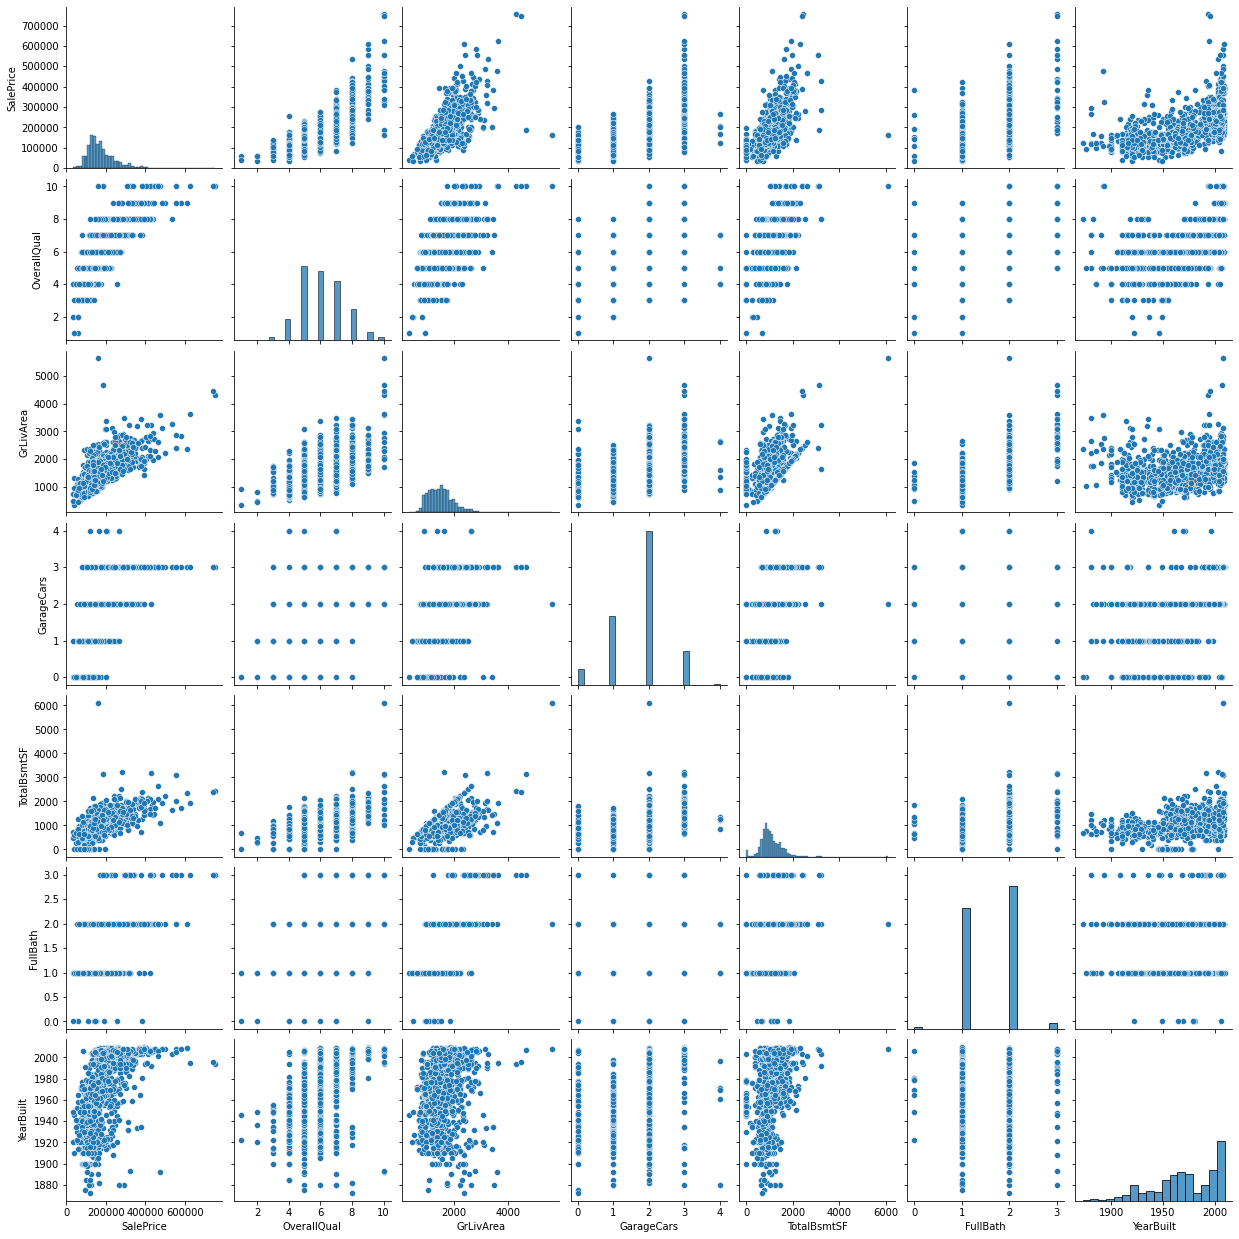

In [25]:
#scatterplot
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df[cols])
plt.show()

**Observation** <br>The Pairplot shows saleprice has linear relationship with overallquality, Garden living area,TotalBsmtSF,yearbuilt

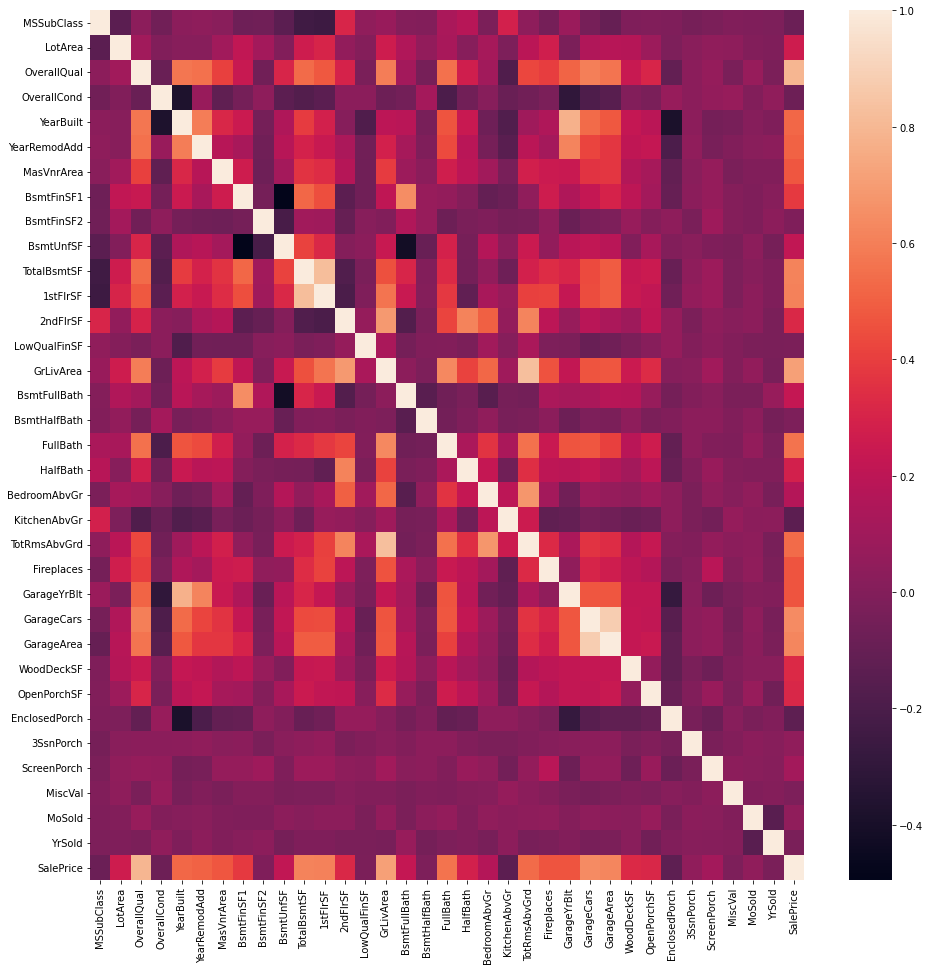

In [26]:
plt.figure(figsize=(16,16))
sns.heatmap(df.corr(),annot=False)
plt.show()

**Observation** <br>The Countplot shows there are some high correlations

# Data Transformations

In [27]:
# Creating a new Column to determine the age of the property
df['age']=df['YrSold']-df['YearBuilt']
df['garage_age'] = df['YrSold'] - df['GarageYrBlt']
df['remodel_age'] = df['YrSold'] - df['YearRemodAdd']

df.drop('GarageYrBlt',axis=1,inplace=True)

In [28]:
#Converting a Binary varible into numeric datatypes
# mapping it to 0 and 1

df['CentralAir'] = df['CentralAir'].apply(lambda x : 1 if x == 'Y' else 0)
                                                  
df['PavedDrive'] = df['PavedDrive'].apply(lambda x : 1 if x == 'Y' else 0)   

In [29]:
# Get Numerical columns
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_features = df.select_dtypes(include = numerics).columns.values
numerical_features

array(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', 'CentralAir', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
       '3SsnPorch', 'ScreenPorch', 'MiscVal', 'MoSold', 'YrSold',
       'SalePrice', 'age', 'garage_age', 'remodel_age'], dtype=object)

In [30]:
# Get Categorical columns
categorical_features = df.select_dtypes(exclude = numerics).columns.values
categorical_features

array(['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'Electrical', 'KitchenQual', 'Functional', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'SaleType',
       'SaleCondition'], dtype=object)

In [31]:
#Remove outliers
z = np.abs(stats.zscore(df[numerical_features]))
selected = df[numerical_features][(z < 3).all(axis=1)]
df = df.loc[selected.index]

In [32]:
# Creating dummies for categorical variables
dummies=pd.get_dummies(df[categorical_features],drop_first=True)

In [33]:
# Drop Categorical columns
df.drop(categorical_features,axis=1,inplace=True)

In [34]:
# Concatenate original dataframe and dummies
df_final=pd.concat([df,dummies],axis=1)

In [35]:
# Final Data frame
df_final

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,8450,7,5,2003,2003,196.0,706,0,150,...,0,0,0,0,0,1,0,0,1,0
2,60,11250,7,5,2001,2002,162.0,486,0,434,...,0,0,0,0,0,1,0,0,1,0
4,60,14260,8,5,2000,2000,350.0,655,0,490,...,0,0,0,0,0,1,0,0,1,0
6,20,10084,8,5,2004,2005,186.0,1369,0,317,...,0,0,0,0,0,1,0,0,1,0
10,20,11200,5,5,1965,1965,0.0,906,0,134,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1452,180,3675,5,5,2005,2005,80.0,547,0,0,...,0,0,0,0,0,1,0,0,1,0
1453,20,17217,5,5,2006,2006,0.0,0,0,1140,...,0,0,0,0,0,1,0,0,0,0
1454,20,7500,7,5,2004,2005,0.0,410,0,811,...,0,0,0,0,0,1,0,0,1,0
1455,60,7917,6,5,1999,2000,0.0,0,0,953,...,0,0,0,0,0,1,0,0,1,0


In [36]:
# Split train & test data
df_train, df_test = train_test_split(df_final, train_size = 0.8, test_size = 0.2, random_state = 1)

In [37]:
# Check shape of train set
df_train.shape

(742, 198)

In [38]:
# Check shape of test set
df_test.shape

(186, 198)

In [39]:
#Split train & test sets 
y_train = df_train.SalePrice
X_train = df_train.drop("SalePrice",1)

y_test= df_test.SalePrice
X_test = df_test.drop("SalePrice",1)

C:\Users\BHANUP~1.D\AppData\Local\Temp/ipykernel_13824/1185804508.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X_train = df_train.drop("SalePrice",1)
C:\Users\BHANUP~1.D\AppData\Local\Temp/ipykernel_13824/1185804508.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X_test = df_test.drop("SalePrice",1)


In [40]:
#Transforming the Target feature to make the data gaussian
pt = PowerTransformer(method='box-cox', standardize=False)
y_train = pt.fit_transform(y_train.to_frame())
y_test = pt.transform(y_test.to_frame())

In [41]:
# Scaling numerical data
num_values=X_train.select_dtypes(include=['int64','float64']).columns
scaler = StandardScaler()
X_train[num_values] = scaler.fit_transform(X_train[num_values])
X_test[num_values] = scaler.transform(X_test[num_values])

# Linear Regression with RFE

In [42]:
# linear regression with all predictors
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [43]:
# Calculating the RFE
rfe = RFE(lm, 20)
rfe = rfe.fit(X_train, y_train)

C:\Users\bhanuprakash.d\Anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_features_to_select=20 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [44]:
# Check top 20 selected columns
col=X_train.columns[rfe.support_]
col

Index(['1stFlrSF', '2ndFlrSF', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL',
       'MSZoning_RM', 'Neighborhood_MeadowV', 'RoofStyle_Mansard',
       'RoofMatl_WdShake', 'Exterior1st_ImStucc', 'ExterQual_Fa',
       'ExterQual_Gd', 'ExterQual_TA', 'KitchenQual_Fa', 'Functional_Typ',
       'GarageType_CarPort', 'SaleType_CWD', 'SaleType_Con', 'SaleType_ConLI',
       'SaleCondition_Alloca'],
      dtype='object')

In [45]:
#create first model

X_train_rfe=X_train[col]
X_train_new = sm.add_constant(X_train_rfe)

lr=sm.OLS(y_train,X_train_new)

#fit the model
lr_model=lr.fit()

#Print the summary 
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     185.0
Date:                Wed, 06 Apr 2022   Prob (F-statistic):          7.83e-268
Time:                        13:10:06   Log-Likelihood:                 1163.2
No. Observations:                 742   AIC:                            -2284.
Df Residuals:                     721   BIC:                            -2188.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    7.4333      0.054    138.503      0.000       7.328       7.539
1stFlrSF                 0.0772      0.003     30.276      0.000       0.072       0.082
2ndFlrSF                 0.0602      0.002     26.742      0.000       0.056       0.065
MSZoning_FV              0.2620      0.052      5.055      0.000       0.160       0.364
MSZoning_RH              0.2301      0.056      4.100      0.000       0.120       0.340
MSZoning_RL              0.2435      0.051      4.744      0.000       0.143       0.344
MSZoning_RM              0.2013      0.052      3.904      0.000       0.100       0.303
Neighborhood_MeadowV    -0.0599      0.015     -4.104      0.000      -0.089      -0.031
RoofStyle_Mansard        0.0639      0.052      1.229      0.219      -0.038       0.166
RoofMatl_WdShake        -0.2684      0.074     -3.650      0.000      -0.413      -0.124
Exterior1st_ImStucc      0.0416      0.051      0.810      0.418      -0.059       0.142
ExterQual_Fa            -0.2392      0.040     -5.991      0.000      -0.318      -0.161
ExterQual_Gd            -0.0794      0.013     -6.132      0.000      -0.105      -0.054
ExterQual_TA            -0.1499      0.013    -11.140      0.000      -0.176      -0.123
KitchenQual_Fa          -0.0547      0.019     -2.898      0.004      -0.092      -0.018
Functional_Typ           0.0773      0.009      8.668      0.000       0.060       0.095
GarageType_CarPort       0.1316      0.072      1.817      0.070      -0.011       0.274
SaleType_CWD             0.0864      0.036      2.369      0.018       0.015       0.158
SaleType_Con             0.1078      0.052      2.078      0.038       0.006       0.210
SaleType_ConLI          -0.0597      0.030     -2.010      0.045      -0.118      -0.001
SaleCondition_Alloca    -0.1332      0.052     -2.581      0.010      -0.234      -0.032
==============================================================================
Omnibus:                       91.211   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              295.739
Skew:                          -0.573   Prob(JB):                     6.04e-65
Kurtosis:                       5.873   Cond. No.                         120.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
#Dropping columns with high p values
X_train_rfe=X_train_rfe.drop(['SaleCondition_Alloca','SaleType_CWD','SaleType_Con','SaleType_ConLI','Exterior1st_ImStucc','GarageType_CarPort','RoofStyle_Mansard'],axis=1)

In [47]:
#create second model
X_train_new = sm.add_constant(X_train_rfe)

lr=sm.OLS(y_train,X_train_new)

#fit the model
lr_model=lr.fit()

#Print the summary 
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     275.4
Date:                Wed, 06 Apr 2022   Prob (F-statistic):          1.38e-270
Time:                        13:10:06   Log-Likelihood:                 1150.0
No. Observations:                 742   AIC:                            -2272.
Df Residuals:                     728   BIC:                            -2208.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    7.4995      0.040    186.682      0.000       7.421       7.578
1stFlrSF                 0.0776      0.003     30.239      0.000       0.073       0.083
2ndFlrSF                 0.0606      0.002     26.609      0.000       0.056       0.065
MSZoning_FV              0.2003      0.038      5.335      0.000       0.127       0.274
MSZoning_RH              0.1644      0.043      3.787      0.000       0.079       0.250
MSZoning_RL              0.1776      0.037      4.823      0.000       0.105       0.250
MSZoning_RM              0.1338      0.037      3.597      0.000       0.061       0.207
Neighborhood_MeadowV    -0.0579      0.015     -3.918      0.000      -0.087      -0.029
RoofMatl_WdShake        -0.2056      0.052     -3.919      0.000      -0.309      -0.103
ExterQual_Fa            -0.2373      0.040     -5.869      0.000      -0.317      -0.158
ExterQual_Gd            -0.0787      0.013     -6.003      0.000      -0.104      -0.053
ExterQual_TA            -0.1483      0.014    -10.895      0.000      -0.175      -0.122
KitchenQual_Fa          -0.0547      0.019     -2.862      0.004      -0.092      -0.017
Functional_Typ           0.0757      0.009      8.494      0.000       0.058       0.093
==============================================================================
Omnibus:                       84.451   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              248.088
Skew:                          -0.558   Prob(JB):                     1.34e-54
Kurtosis:                       5.603   Cond. No.                         76.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
# Chekcing the VIF
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
high_vif = vif[vif['VIF']>10]
high_vif

,Features,VIF
4,MSZoning_RL,48.83
10,ExterQual_TA,24.45
12,Functional_Typ,19.52
9,ExterQual_Gd,18.37


In [49]:
#Drop High VIF Features
X_train_rfe=X_train_rfe.drop(['MSZoning_RL','ExterQual_TA','Functional_Typ','ExterQual_Gd'],axis=1)

#create third model
X_train_new = sm.add_constant(X_train_rfe)

lr=sm.OLS(y_train,X_train_new)

#fit the model
lr_model=lr.fit()

#Print the summary 
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     219.7
Date:                Wed, 06 Apr 2022   Prob (F-statistic):          2.57e-201
Time:                        13:10:06   Log-Likelihood:                 975.95
No. Observations:                 742   AIC:                            -1932.
Df Residuals:                     732   BIC:                            -1886.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    7.6311      0.003   2788.855      0.000       7.626       7.636
1stFlrSF                 0.0943      0.003     33.260      0.000       0.089       0.100
2ndFlrSF                 0.0728      0.003     27.330      0.000       0.068       0.078
MSZoning_FV              0.0663      0.009      7.050      0.000       0.048       0.085
MSZoning_RH             -0.0136      0.029     -0.461      0.645      -0.071       0.044
MSZoning_RM             -0.0474      0.009     -5.521      0.000      -0.064      -0.031
Neighborhood_MeadowV    -0.0567      0.019     -3.046      0.002      -0.093      -0.020
RoofMatl_WdShake        -0.2225      0.066     -3.368      0.001      -0.352      -0.093
ExterQual_Fa            -0.0830      0.048     -1.734      0.083      -0.177       0.011
KitchenQual_Fa          -0.0812      0.024     -3.376      0.001      -0.128      -0.034
==============================================================================
Omnibus:                       89.622   Durbin-Watson:                   1.928
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              188.353
Skew:                          -0.702   Prob(JB):                     1.26e-41
Kurtosis:                       5.031   Cond. No.                         32.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
# Chekcing the VIF
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
high_vif = vif[vif['VIF']>5]
high_vif

,Features,VIF


In [51]:
# Drop High P value features
X_train_rfe=X_train_rfe.drop(['MSZoning_RH','ExterQual_Fa'],axis=1)

#create fourth model
X_train_new = sm.add_constant(X_train_rfe)

lr=sm.OLS(y_train,X_train_new)

#fit the model
lr_model=lr.fit()

#Print the summary 
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     281.6
Date:                Wed, 06 Apr 2022   Prob (F-statistic):          4.49e-203
Time:                        13:10:06   Log-Likelihood:                 974.33
No. Observations:                 742   AIC:                            -1933.
Df Residuals:                     734   BIC:                            -1896.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    7.6308      0.003   2803.537      0.000       7.625       7.636
1stFlrSF                 0.0947      0.003     33.533      0.000       0.089       0.100
2ndFlrSF                 0.0729      0.003     27.433      0.000       0.068       0.078
MSZoning_FV              0.0667      0.009      7.090      0.000       0.048       0.085
MSZoning_RM             -0.0466      0.009     -5.434      0.000      -0.063      -0.030
Neighborhood_MeadowV    -0.0566      0.019     -3.038      0.002      -0.093      -0.020
RoofMatl_WdShake        -0.2234      0.066     -3.379      0.001      -0.353      -0.094
KitchenQual_Fa          -0.0912      0.023     -3.905      0.000      -0.137      -0.045
==============================================================================
Omnibus:                       90.133   Durbin-Watson:                   1.933
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              187.449
Skew:                          -0.709   Prob(JB):                     1.98e-41
Kurtosis:                       5.014   Cond. No.                         32.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
# Chekcing the VIF
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
high_vif = vif[vif['VIF']>5]
high_vif

,Features,VIF


**Observation** <br>The fourth model has no multicollinear features and all the p-values are below 5 which makes th model statistically sound and r2-score and adjusted scores almost similar with good F-statistic value

# Ridge Regression

In [53]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100]}
ridge = Ridge()

# Using RFE to find top 20 variables
rfe = RFE(estimator=Ridge(), n_features_to_select=20)
rfe = rfe.fit(X_train,y_train)
col = X_train.columns[rfe.support_]
X_train_rfe = X_train[col]
X_test_rfe = X_test[col]

# cross validation
folds = 10
model_cv = GridSearchCV(estimator = ridge, param_grid = params, scoring= 'r2', cv = folds, return_train_score=True, verbose = 1)            
model_cv.fit(X_train_rfe, y_train) 

cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=30]
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

Fitting 10 folds for each of 26 candidates, totalling 260 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 260 out of 260 | elapsed:    1.3s finished


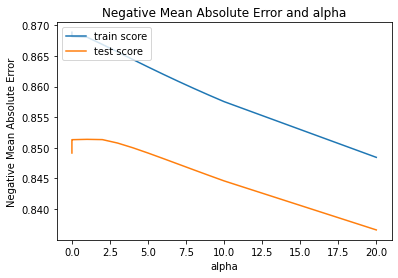

In [54]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [55]:
alpha = cv_results['param_alpha'].loc[cv_results['mean_test_score'].idxmax()]
ridge_final = Ridge(alpha=alpha)
ridge_final.fit(X_train_rfe,y_train)
ridge_coef = ridge_final.coef_
y_train_pred = ridge_final.predict(X_train_rfe)
y_test_pred = ridge_final.predict(X_test_rfe)
print('The optimum alpha is',alpha)
print("Train r2 score",r2_score(y_train, y_train_pred))
print("Test r2 score",r2_score(y_test, y_test_pred))
print("MSE for best alpha",mean_squared_error(y_test, y_test_pred))

The optimum alpha is 1
Train r2 score 0.8675905298549798
Test r2 score 0.7971230980813175
MSE for best alpha 0.0027698136629140126


In [56]:
# Chekcing the VIF
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
high_vif = vif[vif['VIF']>10]
high_vif

,Features,VIF
12,BsmtCond_TA,21.29
16,Functional_Typ,16.79
18,SaleCondition_Normal,10.30


In [57]:
# Dropping cols with high VIF
X_train_rfe2 = X_train_rfe.drop(high_vif.Features,axis=1)
X_test_rfe2 = X_test_rfe.drop(high_vif.Features,axis=1)

In [58]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100]}
ridge = Ridge()

# cross validation
folds = 10
model_cv = GridSearchCV(estimator = ridge, param_grid = params, scoring= 'r2', cv = folds, return_train_score=True, verbose = 1)            
model_cv.fit(X_train_rfe2, y_train) 

cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=30]
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

Fitting 10 folds for each of 26 candidates, totalling 260 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 260 out of 260 | elapsed:    1.2s finished


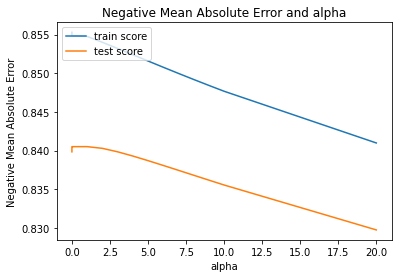

In [59]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [60]:
alpha = cv_results['param_alpha'].loc[cv_results['mean_test_score'].idxmax()]
ridge_final2 = Ridge(alpha=alpha)
ridge_final2.fit(X_train_rfe2,y_train)
ridge_coef2 = ridge_final2.coef_
y_train_pred = ridge_final2.predict(X_train_rfe2)
y_test_pred = ridge_final2.predict(X_test_rfe2)
print('The optimum alpha is',alpha)
print("Train r2 score",r2_score(y_train, y_train_pred))
print("Test r2 score",r2_score(y_test, y_test_pred))
print("MSE for best alpha",mean_squared_error(y_test, y_test_pred))

The optimum alpha is 1
Train r2 score 0.8543812582557022
Test r2 score 0.7609789596856678
MSE for best alpha 0.0032632780613532845


In [61]:
# Chekcing the VIF
vif = pd.DataFrame()
vif['Features'] = X_train_rfe2.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe2.values, i) for i in range(X_train_rfe2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
high_vif = vif[vif['VIF']>10]
high_vif

,Features,VIF


In [62]:
#Displaing the co-efficients of the model
ridge_coeff2 = pd.DataFrame(np.atleast_2d(ridge_coef2),columns=X_train_rfe2.columns)
ridge_coeff2 = ridge_coeff2.T
ridge_coeff2.rename(columns={0: 'Ridge Co-Efficient'},inplace=True)
ridge_coeff2.sort_values(by=['Ridge Co-Efficient'], ascending=False,inplace=True)
ridge_coeff2

,Ridge Co-Efficient
GrLivArea,0.050729
OverallQual,0.046780
BsmtExposure_Gd,0.044848
Neighborhood_NridgHt,0.042378
Neighborhood_Crawfor,0.039044
SaleType_CWD,0.036295
Neighborhood_StoneBr,0.034124
SaleCondition_Partial,0.032772
BsmtCond_Gd,-0.000382
KitchenQual_TA,-0.030739


# Lasso Regression

In [63]:
# find the optimum alpha
params = {'alpha': [0.00001, 0.00009, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008, 0.0009 , 0.001, 0.01, 0.05, 0.1, ]}
lasso = Lasso(random_state=42)

# cross validation
folds = 10
model_cv = GridSearchCV(estimator = lasso, param_grid = params, scoring= 'r2', cv = folds, return_train_score=True, verbose = 1)            
model_cv.fit(X_train_rfe2, y_train) 

cv_results = pd.DataFrame(model_cv.cv_results_)

Fitting 10 folds for each of 15 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.8s finished


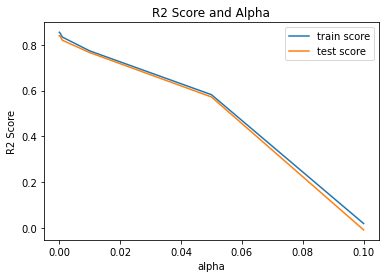

In [64]:
# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R2 Score')
plt.title("R2 Score and Alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [65]:
alpha = cv_results['param_alpha'].loc[cv_results['mean_test_score'].idxmax()]
lasso_final2 = Lasso(alpha=alpha,random_state=100)
lasso_final2.fit(X_train_rfe2,y_train)
lasso_coef2 = lasso_final2.coef_
y_train_pred = lasso_final2.predict(X_train_rfe2)
y_test_pred = lasso_final2.predict(X_test_rfe2)
print('The optimum alpha is',alpha)
print("Train r2 score",r2_score(y_train, y_train_pred))
print("Test r2 score",r2_score(y_test, y_test_pred))
print("MSE for best alpha",mean_squared_error(y_test, y_test_pred))

The optimum alpha is 9e-05
Train r2 score 0.8537179305476092
Test r2 score 0.7610746582512418
MSE for best alpha 0.0032619715193470656


In [66]:
#Displaing the co-efficients of the model
lasso_coeff2 = pd.DataFrame(np.atleast_2d(lasso_coef2),columns=X_train_rfe2.columns)
lasso_coeff2 = lasso_coeff2.T
lasso_coeff2.rename(columns={0: "Lasso Co-Efficient"},inplace=True)
lasso_coeff2.sort_values(by=['Lasso Co-Efficient'], ascending=False,inplace=True)
lasso_coeff2

,Lasso Co-Efficient
GrLivArea,0.050578
OverallQual,0.047210
BsmtExposure_Gd,0.044367
Neighborhood_NridgHt,0.041452
Neighborhood_Crawfor,0.038132
SaleCondition_Partial,0.032279
Neighborhood_StoneBr,0.031600
SaleType_CWD,0.020867
BsmtCond_Gd,-0.000000
Neighborhood_Blueste,-0.000000


**Observation** <br>The best alpha value for Ridge is 1 <br> The best alpha value for Lasso is 0.00009

# Subjective questions Analysis

In [67]:
# Doubling alphas for ridge and lasso
double_ridge_alpha=1*2
double_lasso_alpha=0.00009*2

# Double alpha Ridge Model

In [68]:
# Build double alpha ridge model
ridge_double = Ridge(alpha=double_ridge_alpha)
ridge_double.fit(X_train_rfe2,y_train)
ridge_double_coef = ridge_double.coef_
y_train_pred = ridge_double.predict(X_train_rfe2)
y_test_pred = ridge_double.predict(X_test_rfe2)
print("Train r2 score",r2_score(y_train, y_train_pred))
print("Test r2 score",r2_score(y_test, y_test_pred))
print("MSE for best alpha",mean_squared_error(y_test, y_test_pred))

Train r2 score 0.8537112140191716
Test r2 score 0.76120551396102
MSE for best alpha 0.0032601849880594413


In [69]:
ridge_double_coeff = pd.DataFrame(np.atleast_2d(ridge_double_coef),columns=X_train_rfe2.columns)
ridge_double_coeff = ridge_double_coeff.T
ridge_double_coeff.rename(columns={0: 'Ridge Doubled Alpha Co-Efficient'},inplace=True)
ridge_double_coeff.sort_values(by=['Ridge Doubled Alpha Co-Efficient'], ascending=False,inplace=True)
print('The most important predictor variables are as follows:')
ridge_double_coeff

The most important predictor variables are as follows:


,Ridge Doubled Alpha Co-Efficient
GrLivArea,0.050733
OverallQual,0.047428
BsmtExposure_Gd,0.043952
Neighborhood_NridgHt,0.041123
Neighborhood_Crawfor,0.037102
SaleCondition_Partial,0.032310
Neighborhood_StoneBr,0.031689
SaleType_CWD,0.027306
BsmtCond_Gd,0.000060
Neighborhood_Blueste,-0.021085


# Double alpha Lasso Model

In [70]:
# Build double alpha lasso model
lasso_double = Lasso(alpha=double_lasso_alpha)
lasso_double.fit(X_train_rfe2,y_train)
lasso_double_coef = ridge_double.coef_
y_train_pred = lasso_double.predict(X_train_rfe2)
y_test_pred = lasso_double.predict(X_test_rfe2)
print("Train r2 score",r2_score(y_train, y_train_pred))
print("Test r2 score",r2_score(y_test, y_test_pred))
print("MSE for best alpha",mean_squared_error(y_test, y_test_pred))

Train r2 score 0.8524313877808778
Test r2 score 0.7611358090753069
MSE for best alpha 0.0032611366466415385


In [71]:
lasso_double_coeff = pd.DataFrame(np.atleast_2d(lasso_double_coef),columns=X_train_rfe2.columns)
lasso_double_coeff = lasso_double_coeff.T
lasso_double_coeff.rename(columns={0: 'Lasso Doubled Alpha Co-Efficient'},inplace=True)
lasso_double_coeff.sort_values(by=['Lasso Doubled Alpha Co-Efficient'], ascending=False,inplace=True)
print('The most important predictor variables are as follows:')
lasso_double_coeff

The most important predictor variables are as follows:


,Lasso Doubled Alpha Co-Efficient
GrLivArea,0.050733
OverallQual,0.047428
BsmtExposure_Gd,0.043952
Neighborhood_NridgHt,0.041123
Neighborhood_Crawfor,0.037102
SaleCondition_Partial,0.032310
Neighborhood_StoneBr,0.031689
SaleType_CWD,0.027306
BsmtCond_Gd,0.000060
Neighborhood_Blueste,-0.021085


# Remove top-5 features and rebuild Lasso

In [72]:
#Removing the 5 most important predictor variables from the incoming dataset
X_test_rfe3 = X_test_rfe2.drop(['GrLivArea','OverallQual','BsmtExposure_Gd','Neighborhood_NridgHt','Neighborhood_Crawfor'],axis=1)
X_train_rfe3 = X_train_rfe2.drop(['GrLivArea','OverallQual','BsmtExposure_Gd','Neighborhood_NridgHt','Neighborhood_Crawfor'],axis=1)

# Building Lasso Model with the new dataset
lasso3 = Lasso(alpha=0.00009)
lasso3.fit(X_train_rfe3,y_train)
lasso3_coef = lasso3.coef_
y_train_pred = lasso3.predict(X_train_rfe3)
y_test_pred = lasso3.predict(X_test_rfe3)
print("Train r2 score",r2_score(y_train, y_train_pred))
print("Test r2 score",r2_score(y_test, y_test_pred))
print("MSE for best alpha",mean_squared_error(y_test, y_test_pred))

Train r2 score 0.5290875839983422
Test r2 score 0.451718243773927
MSE for best alpha 0.007485516020597409


In [73]:
lasso3_coeff = pd.DataFrame(np.atleast_2d(lasso3_coef),columns=X_train_rfe3.columns)
lasso3_coeff = lasso3_coeff.T
lasso3_coeff.rename(columns={0: 'Lasso Co-Efficient'},inplace=True)
lasso3_coeff.sort_values(by=['Lasso Co-Efficient'], ascending=False,inplace=True)
print('The top-5 features after rebuilding Lasso model are as follows:')
lasso3_coeff.head(5)

The top-5 features after rebuilding Lasso model are as follows:


,Lasso Co-Efficient
SaleType_CWD,0.131506
Neighborhood_StoneBr,0.064718
SaleCondition_Partial,0.045327
BsmtCond_Gd,0.030206
Neighborhood_Blueste,-0.000000
